In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [145]:


df = pd.read_excel('data/datacities.xlsx')
df.head()  # Muestra las primeras filas para verificar


,City,GDP,Population,Unemployment Rate,Average Age,Women (%),Men (%),Budget,Initial Label,Label
0,Bogotá,103.5,7.18,7.18,32,52,48,18.0,2,Yes
1,Medellín,44.1,2.57,11.20,31,53,47,7.5,3,Yes
2,Cali,22.4,2.23,13.80,30,52,48,4.2,2,Yes
3,Barranquilla,16.8,1.23,12.40,29,51,49,3.1,3,Yes
4,Cartagena,10.5,1.03,10.90,30,51,49,2.8,1,Yes


1.1 calcular media, mediana, desviacion estandar, la moda y  los 
valores repeticiones de la moda para los datos categóricos. 


In [124]:

# Calcular medidas de tendencia central
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
desviacion = df.std(numeric_only=True)
moda = df.mode().iloc[0]  # Se toma la primera fila ya que mode() puede retornar varias
categorical_cols = ["Label"]

print("Media:\n", media)
print("\nMediana:\n", mediana)
print("\nDesviación estándar:\n", desviacion)
print("\nModa:\n", moda)
for col in categorical_cols:
    print(f"\nModa y repeticiones en {col}:")
    print(df[col].value_counts())

Media:
 GDP                   8.750000
Population            0.731000
Unemployment Rate    13.435333
Average Age          29.233333
Women (%)            51.500000
Men (%)              48.500000
Budget                1.650000
Initial Label         1.700000
dtype: float64

Mediana:
 GDP                   2.65
Population            0.39
Unemployment Rate    13.45
Average Age          29.00
Women (%)            51.00
Men (%)              49.00
Budget                0.60
Initial Label         2.00
dtype: float64

Desviación estándar:
 GDP                  19.914433
Population            1.352832
Unemployment Rate     3.869034
Average Age           2.238893
Women (%)             0.776819
Men (%)               0.776819
Budget                3.451187
Initial Label         1.055364
dtype: float64

Moda:
 City                 Arauca
GDP                     0.6
Population             0.01
Unemployment Rate      0.58
Average Age            29.0
Women (%)              51.0
Men (%)                49

1.2 Dibujar el Boxplot

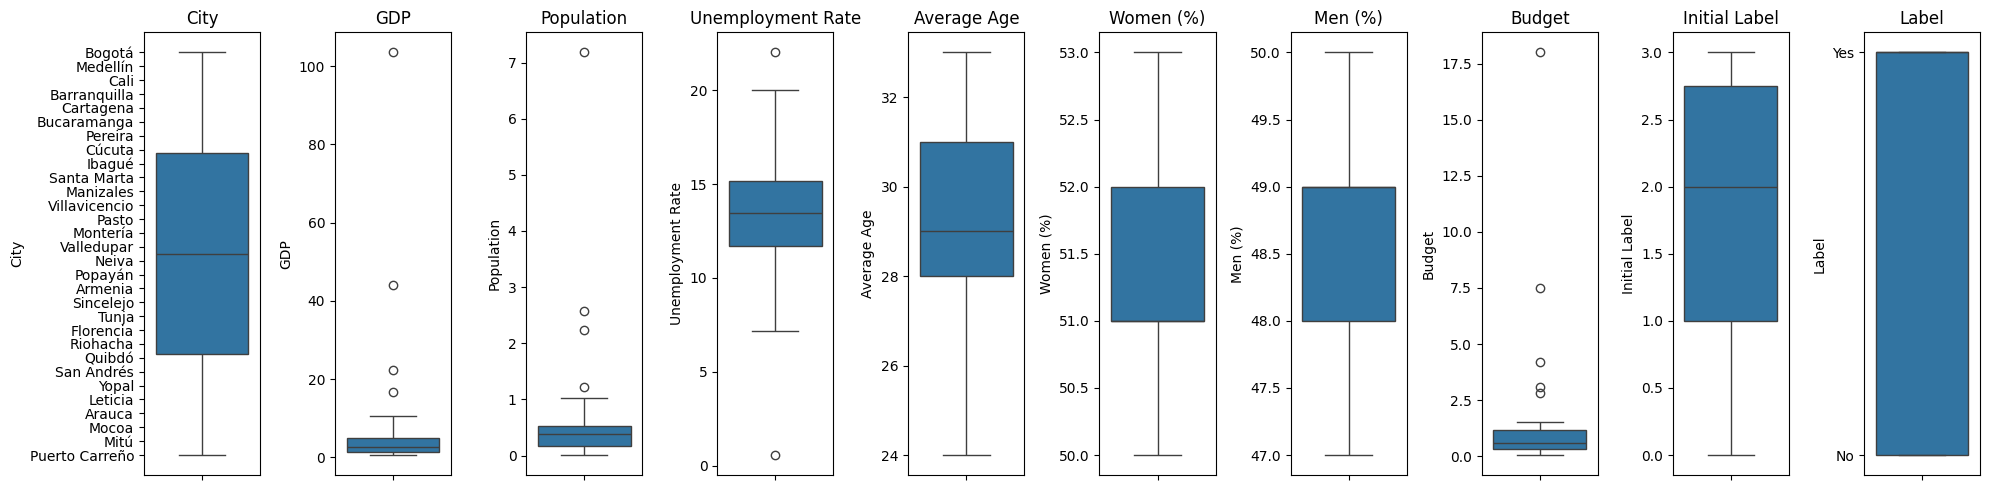

In [125]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,5))
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axs[i])
    axs[i].set_title(column)
plt.tight_layout()
plt.show()


1.3 Covarianza

In [126]:
covarianza = df[["GDP", "Population"]].cov()
print("\nCovarianza:\n", covarianza)



Covarianza:
                    GDP  Population
GDP         396.584655   26.685224
Population   26.685224    1.830154


1.4 Correlacion

In [127]:
correlacion = df[["GDP", "Population"]].corr()
print("\nCorrelación:\n", correlacion)



Correlación:
                 GDP  Population
GDP         1.00000     0.99051
Population  0.99051     1.00000


1.5 Relacion entre Covarianza y Correlacion

La covarianza indica la dirección de la relación entre las dos variables.

La correlación indica tanto la dirección como la fuerza de la relación, y es más útil para interpretar y comparar.

2. PCA
    Utilizar los datos de la tabla 1, para calcular PCA y reducir la 
    dimensionalidad de 2 dimensiones a 1. Para este ejercicio se debe utilizar las 
    variables GDP (USD Billion) y Population (Millions) para crear un vector con una 
    sola dimensión. 

In [128]:
datos_PCA = df[["GDP", "Population"]]
#Normalizamos los datos
escalador = StandardScaler()
datos_normalizados = escalador.fit_transform(datos_PCA)
print(datos_normalizados)

[[ 4.83919245  4.84853094]
 [ 1.80544014  1.38260946]
 [ 0.69715015  1.12698835]
 [ 0.41113983  0.37516157]
 [ 0.08937822  0.22479621]
 [-0.07405624 -0.11352584]
 [-0.13023684 -0.18870852]
 [-0.18641744  0.02180298]
 [-0.20173942 -0.15111718]
 [-0.24259804 -0.15863545]
 [-0.25281269 -0.22629986]
 [-0.26813467 -0.17367199]
 [-0.28345666 -0.21126333]
 [-0.29367131 -0.18119026]
 [-0.30388596 -0.19622679]
 [-0.31920795 -0.28644601]
 [-0.3294226  -0.30148254]
 [-0.33963725 -0.32403734]
 [-0.34474458 -0.33907388]
 [-0.35495924 -0.36162868]
 [-0.36006656 -0.39922002]
 [-0.37028122 -0.38418349]
 [-0.38049587 -0.4518479 ]
 [-0.3856032  -0.48943924]
 [-0.39071052 -0.43681136]
 [-0.39581785 -0.51199404]
 [-0.40092518 -0.48943924]
 [-0.40603251 -0.51951231]
 [-0.41113983 -0.54206711]
 [-0.41624716 -0.54206711]]


2.1 Cual es la matriz de covarianza 

In [129]:
#matriz covarianza
cov = datos_PCA.cov()
cov

,GDP,Population
GDP,396.584655,26.685224
Population,26.685224,1.830154


2.2 Cuales son los eigenvalues 

In [130]:
# eigenvalues
cov_array = cov.values
eigenvalues, eigenvector = np.linalg.eig(cov_array)
print(eigenvalues)


[3.98380395e+02 3.44139937e-02]


2.3 Cuál es la varianza explicada por el eigenvalue. 

In [131]:
#Varianza explicada
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Varianza explicada por componente:\n", explained_variance_ratio)


Varianza explicada por componente:
 [9.99913623e-01 8.63772954e-05]


2.4 Cual es el valor del eigenvector 

In [132]:
#eigenvector
print(eigenvector)

[[ 0.99774346 -0.06714158]
 [ 0.06714158  0.99774346]]


2.5 Cuál es la matriz proyectada. 

In [133]:
#Matriz proyectada
matriz_proyectada = np.dot(datos_normalizados, eigenvector)
print(matriz_proyectada)

[[ 5.15381062  4.51267902]
 [ 1.89419666  1.25826945]
 [ 0.77124478  1.0776375 ]
 [ 0.43540102  0.34671042]
 [ 0.10426971  0.21828795]
 [-0.08151144 -0.10829742]
 [-0.14261314 -0.17953839]
 [-0.1845329   0.03427014]
 [-0.21143043 -0.13723108]
 [-0.25270164 -0.14198907]
 [-0.26743634 -0.20881496]
 [-0.27919023 -0.15527711]
 [-0.29700158 -0.19175488]
 [-0.30517403 -0.16106384]
 [-0.31637521 -0.17538061]
 [-0.33772008 -0.2643675 ]
 [-0.34892126 -0.27868428]
 [-0.36062723 -0.30050236]
 [-0.3667326  -0.31516205]
 [-0.37843857 -0.33698013]
 [-0.38605832 -0.37414373]
 [-0.39524035 -0.3584553 ]
 [-0.40997505 -0.42528119]
 [-0.41759479 -0.46244479]
 [-0.41915707 -0.40959276]
 [-0.42930076 -0.48426287]
 [-0.4328822  -0.46141605]
 [-0.43999715 -0.49107835]
 [-0.44660732 -0.51323934]
 [-0.45170312 -0.51289643]]


2.5 Cual es el error o diferencia entre la matriz proyectada 

In [134]:
#error o diferencia entre la matriz proyectada
error_M = datos_PCA - matriz_proyectada
print(error_M)

          GDP  Population
0   98.346189    2.667321
1   42.205803    1.311731
2   21.628755    1.152363
3   16.364599    0.883290
4   10.395730    0.811712
5    7.381511    0.688297
6    6.342613    0.659538
7    5.284533    0.725730
8    5.011430    0.667231
9    4.252702    0.661989
10   4.067436    0.638815
11   3.779190    0.655277
12   3.497002    0.641755
13   3.305174    0.651064
14   3.116375    0.645381
15   2.837720    0.614368
16   2.648921    0.608684
17   2.460627    0.600502
18   2.366733    0.595162
19   2.178439    0.586980
20   2.086058    0.574144
21   1.895240    0.578455
22   1.709975    0.555281
23   1.617595    0.542445
24   1.519157    0.559593
25   1.429301    0.534263
26   1.332882    0.541416
27   1.239997    0.531078
28   1.146607    0.523239
29   1.051703    0.522896


In [135]:
#reducir a una dimension
pca = PCA(n_components=1)
datos_reducidos = pca.fit_transform(datos_normalizados)
print(datos_reducidos)

[[ 6.8502549 ]
 [ 2.25429149]
 [ 1.28986071]
 [ 0.55599905]
 [ 0.22215487]
 [-0.13264057]
 [-0.22552843]
 [-0.1164    ]
 [-0.2495073 ]
 [-0.28371492]
 [-0.33878374]
 [-0.31240449]
 [-0.34981985]
 [-0.33577783]
 [-0.35363312]
 [-0.42826202]
 [-0.4461173 ]
 [-0.46928881]
 [-0.48353267]
 [-0.50670418]
 [-0.53689669]
 [-0.53348711]
 [-0.58855592]
 [-0.61874844]
 [-0.58514634]
 [-0.64191995]
 [-0.62958272]
 [-0.65445902]
 [-0.6740191 ]
 [-0.67763052]]


2.7 Pintar todas las ciudades en 1 dimensión

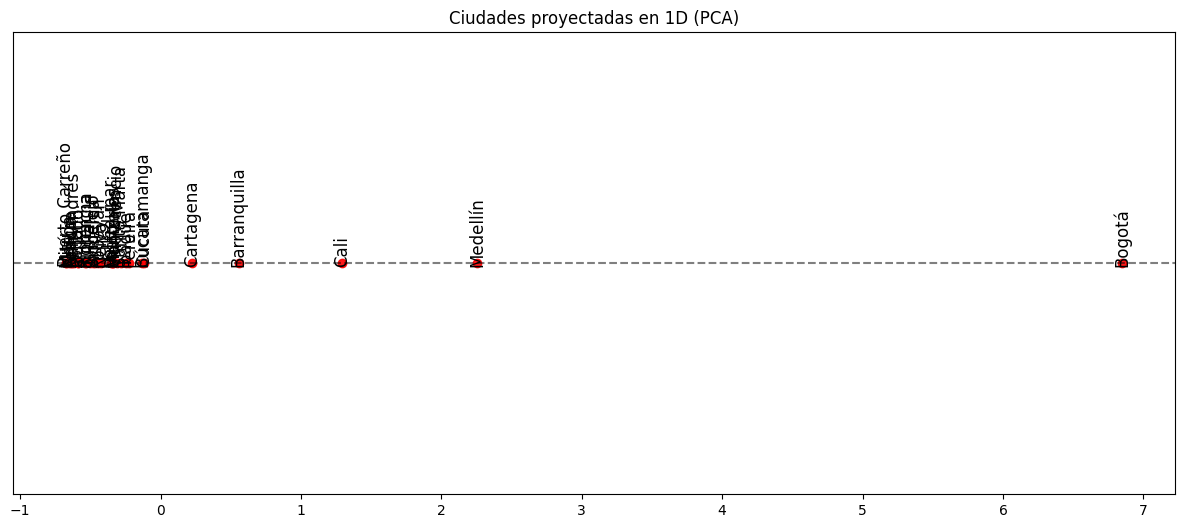

In [136]:
#ciudades en 1D
#crear grafico
plt.figure(figsize=(15, 6))
plt.scatter(datos_reducidos, np.zeros_like(datos_reducidos), color='r', alpha=0.9)
#etiquetas ciudad
for i, city in enumerate(df["City"]):
    plt.text(datos_reducidos[i], 0, city, fontsize=12, ha='center', rotation=90)
#configurar grafico
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title("Ciudades proyectadas en 1D (PCA)")
plt.yticks([])
plt.show()


2.8 Utilizar python para pintar todas las ciudades en 2 dimensiones

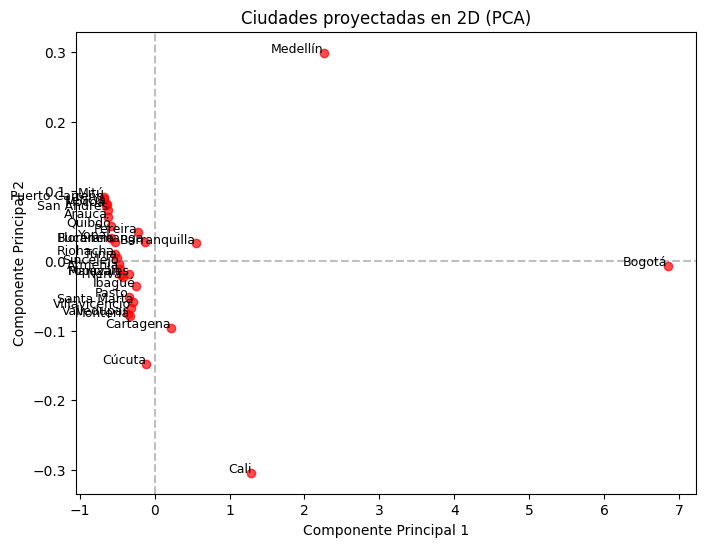

In [137]:
#ciudades en 2D
#Aplicar PCA para reducir a 2d
pca_2D = PCA(n_components=2)
datos_pca_2D = pca_2D.fit_transform(datos_normalizados)
#crear grafico
plt.figure(figsize=(8, 6))
plt.scatter(datos_pca_2D[:, 0], datos_pca_2D[:, 1], color='r', alpha=0.7)
#etiquetas ciudades
for i, city in enumerate(df["City"]):
    plt.text(datos_pca_2D[i, 0], datos_pca_2D[i, 1], city, fontsize=9, ha='right')
#configurar grafico
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Ciudades proyectadas en 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


b0: -1.908609808067796, b1: 14.580861570544181


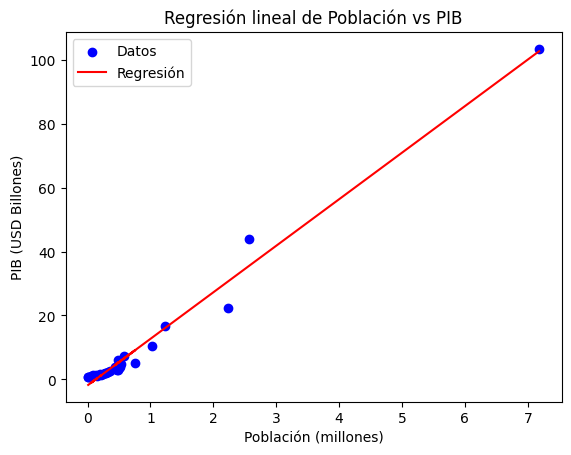

In [138]:
#3
#3.1.
Y= df["GDP"] 
X = df["Population"] 

X_mean = sum(X) / len(X)
Y_mean = sum(Y) / len(Y)

numerator = sum((X - X_mean) * (Y - Y_mean))
denominator = sum((X - X_mean) ** 2)
b1 = numerator / denominator
b0 = Y_mean - b1 * X_mean
print(f"b0: {b0}, b1: {b1}")


#3.2.
plt.scatter(X, Y, color='blue', label='Datos')
plt.plot(X, b0 + b1 * X, color='red', label='Regresión')
plt.xlabel("Población (millones)")
plt.ylabel("PIB (USD Billones)")
plt.title("Regresión lineal de Población vs PIB")
plt.legend()
plt.show()